In [5]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

import wrangle as w

import matplotlib.pyplot as plt

import unicodedata
import nltk
from wordcloud import WordCloud
import os
import time

In [55]:

base_url = 'https://github.com/search?q=stars%3A%3E0&s=stars&type=Repositories'
data = []

# Loop through 10 pages (including the initial page)
for page in range(1, 13):
    url = f'{base_url}&p={page}'
    headers = {"User-Agent": "Chrome/91.0.4472.124"}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    repo_links = soup.select('a.v-align-middle')

    for link in repo_links:

        # Retrieve the README link
        readme_url = link['href']

        # Add the README link to the data list
        data.append(readme_url)
        
        t= 1
        time.sleep(t)


df = pd.DataFrame(data)
print("Number of README files collected:", len(df))



Number of README files collected: 120


In [56]:
data

['/DroidPluginTeam/DroidPlugin',
 '/angular-app/angular-app',
 '/doctrine/event-manager',
 '/huluoyang/freecodecamp.cn',
 '/spolu/breach_core',
 '/doodlewind/jshistory-cn',
 '/qunitjs/qunit',
 '/facebookarchive/scribe',
 '/mcxiaoke/RxDocs',
 '/ming1016/study',
 '/shu223/iOS-9-Sampler',
 '/tckmn/mkcast',
 '/boctor/idev-recipes',
 '/rsms/fb-mac-messenger',
 '/yubo725/flutter-osc',
 '/nryoung/algorithms',
 '/Boris-Em/BEMCheckBox',
 '/rnpm/rnpm',
 '/lloyd/node-memwatch',
 '/android-cn/android-dev-com',
 '/astaxie/build-web-application-with-golang',
 '/xtekky/gpt4free',
 '/NationalSecurityAgency/ghidra',
 '/GitSquared/edex-ui',
 '/laurent22/joplin',
 '/chubin/cheat.sh',
 '/rust-unofficial/awesome-rust',
 '/tabler/tabler',
 '/nodejs/node-v0.x-archive',
 '/koajs/koa',
 '/tencentyun/wafer',
 '/tj/dox',
 '/zcweng/ToggleButton',
 '/AnderWeb/discreteSeekBar',
 '/mislav/git-deploy',
 '/zk00006/OpenTLD',
 '/davidkpiano/react-redux-form',
 '/jorgebastida/gordon',
 '/codestergit/SweetAlert-iOS',
 '/r

In [54]:
df = data.copy()
df

['/spolu/breach_core',
 '/Jawbone/JBChartView',
 '/erming/shout',
 '/android-cn/android-dev-com',
 '/philipwalton/html-inspector',
 '/AnderWeb/discreteSeekBar',
 '/mislav/git-deploy',
 '/reark/reark',
 '/jorgebastida/gordon',
 '/Pluto-Y/iOS-Echarts',
 '/Yalantis/Taurus',
 '/funkia/list',
 '/LinkedDestiny/swoole-doc',
 '/neokree/MaterialNavigationDrawer',
 '/MatthewYork/MYBlurIntroductionView',
 '/JeffreyZhao/wind',
 '/okor/justice',
 '/CenturyLinkLabs/panamax-ui',
 '/paldepind/functional-frontend-architecture',
 '/danielamitay/iHasApp',
 '/JakeWharton/hugo',
 '/Grouper/FlatUIKit',
 '/OwlCarousel2/OwlCarousel2',
 '/ericchiang/pup',
 '/mps-youtube/yewtube',
 '/canonical/microk8s',
 '/robb/Cartography',
 '/DevinVinson/WordPress-Plugin-Boilerplate',
 '/stefanpenner/es6-promise',
 '/marionettejs/backbone.marionette',
 '/animatedjs/animated',
 '/nodejs/node-convergence-archive',
 '/bridgetkromhout/devops-against-humanity',
 '/msys2/msys2',
 '/intelsdi-x/snap',
 '/asm-js/validator',
 '/iPaulP

In [61]:
updated_list = [s[1:] for s in data]
updated_list

['DroidPluginTeam/DroidPlugin',
 'angular-app/angular-app',
 'doctrine/event-manager',
 'huluoyang/freecodecamp.cn',
 'spolu/breach_core',
 'doodlewind/jshistory-cn',
 'qunitjs/qunit',
 'facebookarchive/scribe',
 'mcxiaoke/RxDocs',
 'ming1016/study',
 'shu223/iOS-9-Sampler',
 'tckmn/mkcast',
 'boctor/idev-recipes',
 'rsms/fb-mac-messenger',
 'yubo725/flutter-osc',
 'nryoung/algorithms',
 'Boris-Em/BEMCheckBox',
 'rnpm/rnpm',
 'lloyd/node-memwatch',
 'android-cn/android-dev-com',
 'astaxie/build-web-application-with-golang',
 'xtekky/gpt4free',
 'NationalSecurityAgency/ghidra',
 'GitSquared/edex-ui',
 'laurent22/joplin',
 'chubin/cheat.sh',
 'rust-unofficial/awesome-rust',
 'tabler/tabler',
 'nodejs/node-v0.x-archive',
 'koajs/koa',
 'tencentyun/wafer',
 'tj/dox',
 'zcweng/ToggleButton',
 'AnderWeb/discreteSeekBar',
 'mislav/git-deploy',
 'zk00006/OpenTLD',
 'davidkpiano/react-redux-form',
 'jorgebastida/gordon',
 'codestergit/SweetAlert-iOS',
 'remi/her',
 'dchelimsky/rspec-rails',
 'p

In [36]:
len("blob/master/README.md")

21

In [18]:
# web scrape data on 23 June 2023

base_url = 'https://github.com/search?q=stars%3A%3E0&s=stars&type=Repositories'
data = []

# Loop through 10 pages (including the initial page)
for page in range(1, 12):
    url = f'{base_url}&p={page}'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    repo_links = soup.select('a.v-align-middle')

    for link in repo_links:
        repo_url = 'https://github.com' + link['href']
        repo_response = requests.get(repo_url)
        repo_soup = BeautifulSoup(repo_response.text, 'html.parser')

        readme = repo_soup.select_one('div#readme')
        if readme is not None:
            readme_text = readme.get_text()
            data.append({'Repository': repo_url, 'Readme': readme_text})

df = pd.DataFrame(data)
print("Number of README files collected:", len(df))


Number of README files collected: 0


In [5]:
df.head()

,Repository,Readme
0,https://github.com/vercel-labs/ai,\n\n\n\n\n\n\n\n\n\n\n\nVercel AI SDK\nFeature...
1,https://github.com/a16z/ai,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAI-Playbook\nPro...
2,https://github.com/unifyai/ivy,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nStatus\nUnified ...
3,https://github.com/microsoft/AI,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAI Introduction\...
4,https://github.com/microsoft/AirSim,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAirSim announcem...


In [6]:
# save df to csv
df.to_csv("top_100.csv")

In [25]:
# get df
df = pd.read_csv("top_100.csv", index_col=0)

In [27]:
# rename columns
df = df.rename(columns={"Repository": "repo", "Readme": "original"})

In [31]:
df.head()

,repo,original,clean,stemmed,lemmatized
0,https://github.com/vercel-labs/ai,\n\n\n\n\n\n\n\n\n\n\n\nVercel AI SDK\nFeature...,vercel ai sdk features installation example ai...,vercel ai sdk featur instal exampl ai chatbot ...,vercel ai sdk feature installation example ai ...
1,https://github.com/a16z/ai,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAI-Playbook\nPro...,aiplaybook production url releasing production...,aiplaybook product url releas product run loca...,aiplaybook production url releasing production...
2,https://github.com/unifyai/ivy,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nStatus\nUnified ...,status unified ai ivy transpiler use ivy trans...,statu unifi ai ivi transpil use ivi transpil i...,status unified ai ivy transpiler use ivy trans...
3,https://github.com/microsoft/AI,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAI Introduction\...,ai introduction samples reference architecture...,ai introduct sampl refer architectur best prac...,ai introduction sample reference architecture ...
4,https://github.com/microsoft/AirSim,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAirSim announcem...,airsim announcement repository archived coming...,airsim announc repositori archiv come year wel...,airsim announcement repository archived coming...


In [28]:
# prepare the df
df = w.clean_df(df)

In [35]:
# split the words individually up and                                                                                                                                                                                                                                                                                                             
git_words =" ".join(df.clean).split(" ")

words_freq = pd.Series(git_words).value_counts()

# split the words individually up and                                                                                                                                                                                                                                                                                                             
git_stem_words =" ".join(df.stemmed).split(" ")

stem_freq = pd.Series(git_stem_words).value_counts()

# split the words individually up and                                                                                                                                                                                                                                                                                                             
git_lem_words =" ".join(df.lemmatized).split(" ")

lem_freq = pd.Series(git_lem_words).value_counts()

In [36]:
# create df of freq words
word_counts = pd.concat([words_freq, stem_freq, lem_freq], axis=1).fillna(0).astype(int)

# rename the col names
word_counts.columns = ["clean", "stem", "lemmatize"]

word_counts.head()

,clean,stem,lemmatize
ai,1202,1205,1205
',1105,1105,1105
use,468,1116,468
using,456,0,456
install,339,0,339


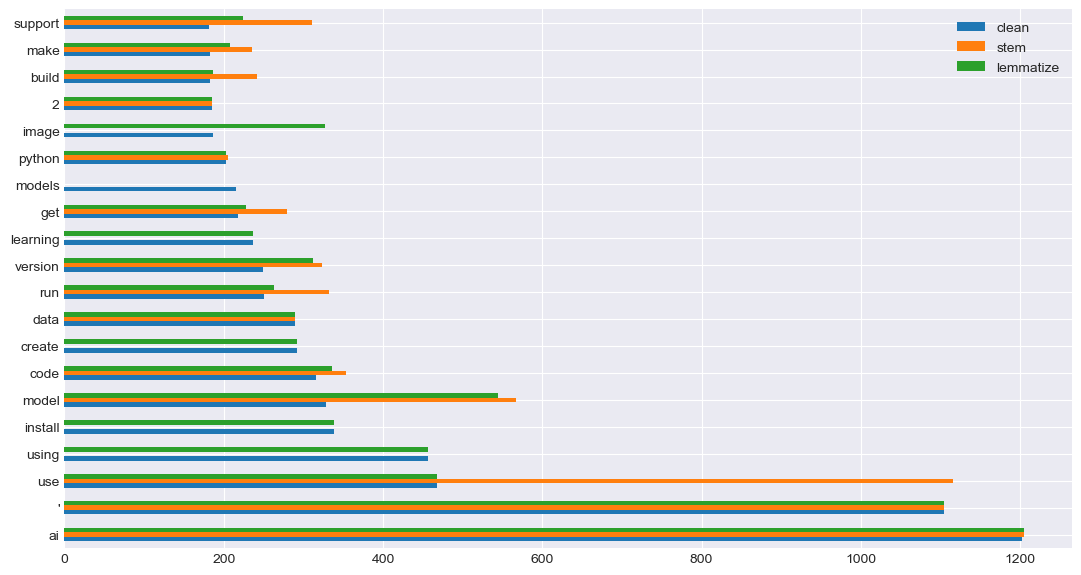

In [50]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')
word_counts.sort_values(["clean", "stem", "lemmatize"], ascending=False).head(20).plot.barh();


In [62]:
def make_ngram(words, n):
    return pd.Series(nltk.ngrams(words, n)).value_counts(ascending=False)
    

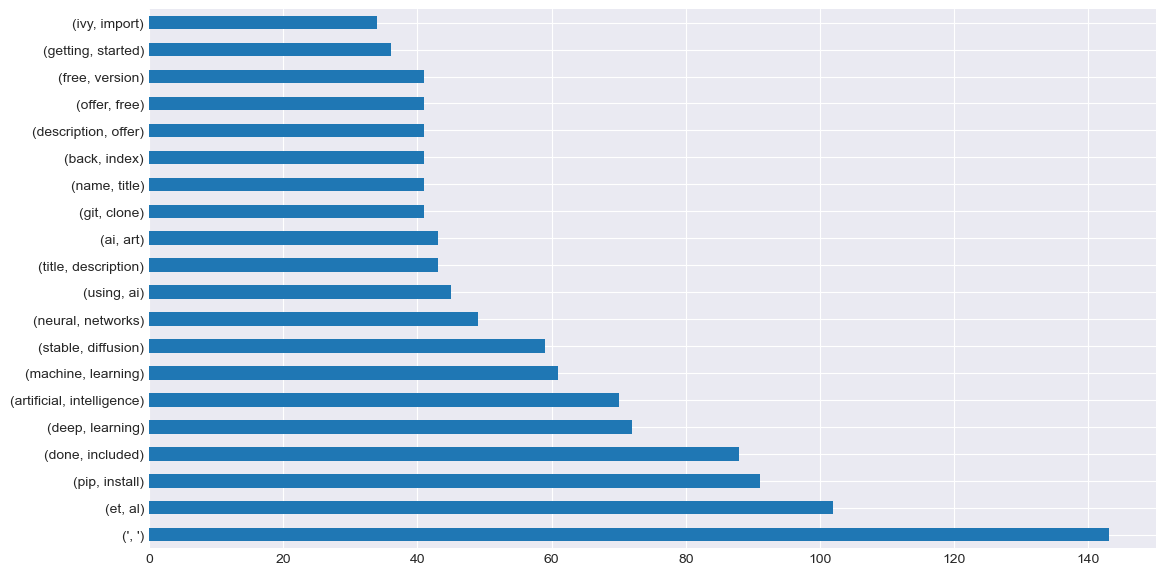

In [63]:
make_ngram(git_words, 2).head(20).plot.barh();

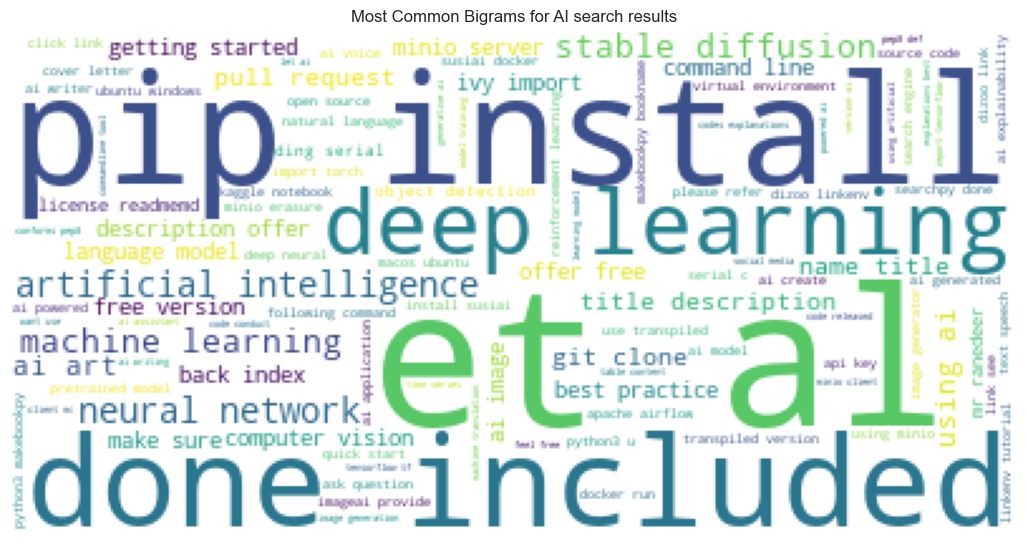

In [51]:
img = WordCloud(background_color="white", collocation_threshold = 2).generate(" ".join(git_words))

plt.imshow(img)
plt.axis("off")
plt.title("Most Common Bigrams for AI search results");

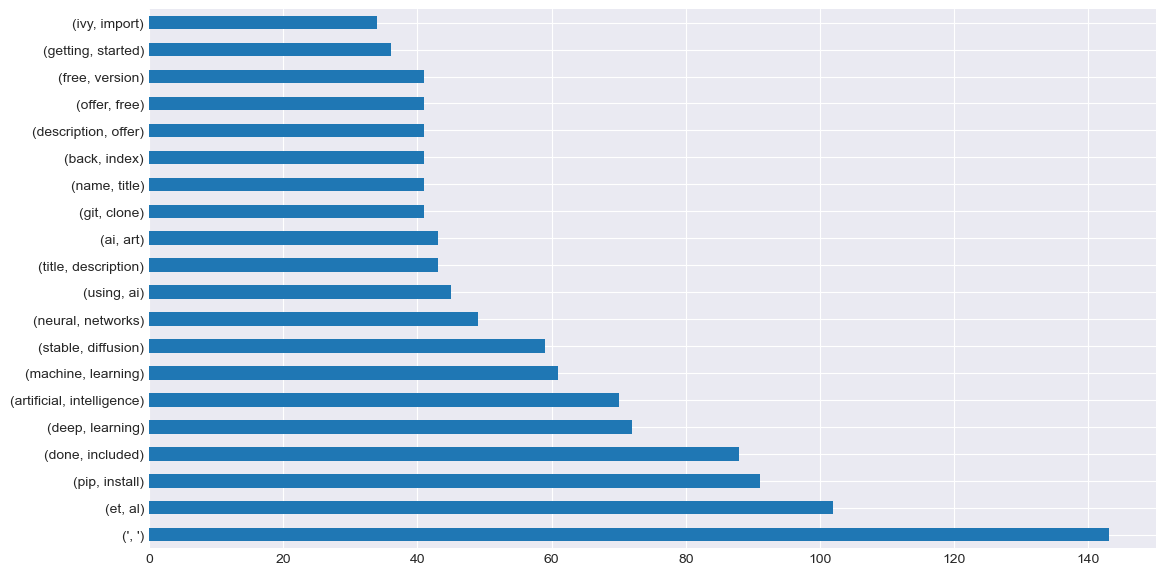

In [64]:
make_ngram(git_words, 2).head(20).plot.barh();

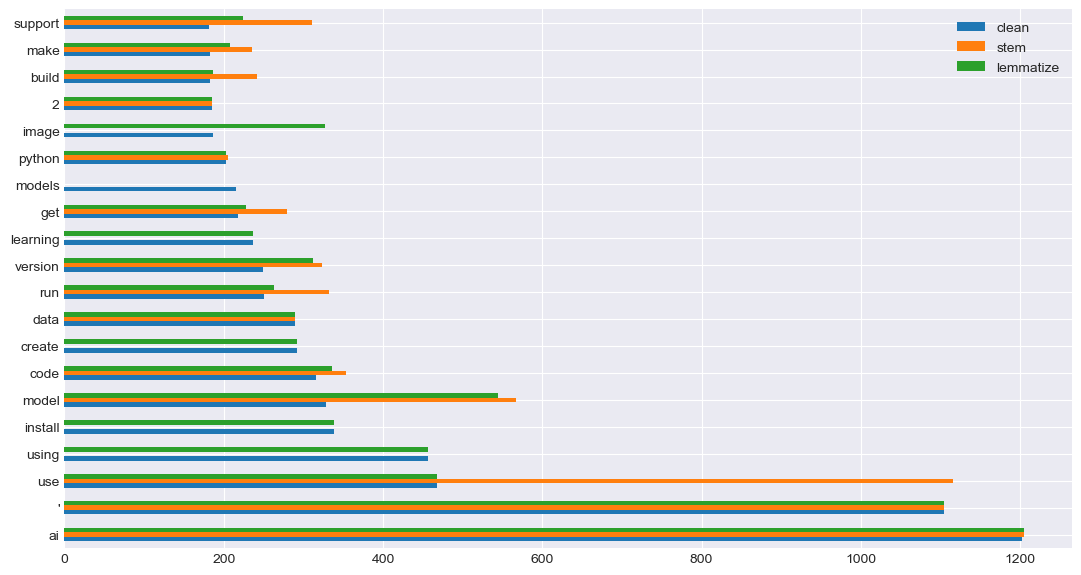

In [58]:
word_counts.sort_values("clean", ascending=False)[["clean", "stem", "lemmatize"]].head(20).plot.barh();